Name-RUGVED THAKARE
ID-2023201049

Ventral Temporal All Features face vs House

In [49]:
pip install nilearn

In [50]:
from nilearn import datasets
subj4 = datasets.fetch_haxby(subjects=[4])

In [51]:
import pandas as pd
import numpy as np

time_series= pd.read_csv('/content/features.csv', header=None,sep=" ")
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'house'], dtype=object)

(1452, 92)
(216, 92)
(216,)


array(['face', 'house'], dtype=object)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.75


In [53]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 6)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 6)
print(condition_mask_train.shape)
print(condition_mask_test.shape)
X_train = time_series[condition_mask_train]
X_test = time_series[condition_mask_test]
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
print(accuracy_score(y_test, predicted))

(1452,)
(1452,)
0.5333333333333333


Accuracy for test chunk 0: 0.2777777777777778
Accuracy for test chunk 1: 0.5
Accuracy for test chunk 2: 0.5555555555555556
Accuracy for test chunk 3: 0.5555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Accuracy for test chunk 4: 0.4444444444444444
Accuracy for test chunk 5: 0.8333333333333334
Accuracy for test chunk 6: 0.6111111111111112
Accuracy for test chunk 7: 0.5
Accuracy for test chunk 8: 0.5555555555555556
Accuracy for test chunk 9: 0.1111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Accuracy for test chunk 10: 0.3333333333333333
Accuracy for test chunk 11: 0.5

Mean Accuracy: 0.4814814814814814
Standard Deviation: 0.17322487901731212


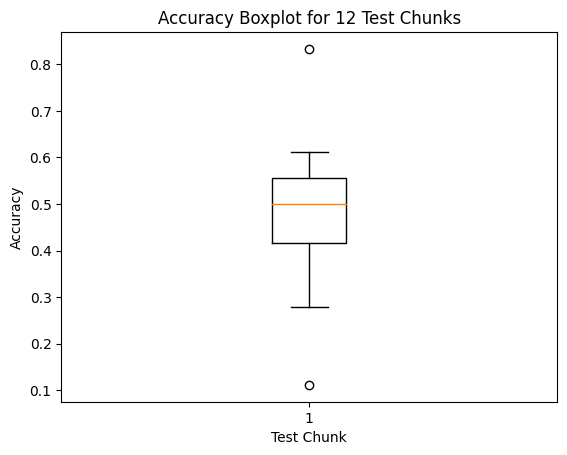

In [54]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()

accuracy_values1 = []

for val in range(12):

    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values1.append(accuracy)

    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values1)
std_accuracy = np.std(accuracy_values1)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values1)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


Ventral temporal All Features Face vs Scissors


In [55]:
import pandas as pd
import numpy as np

time_series= pd.read_csv('/content/features.csv', header=None,sep=" ")
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "scissors"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'scissors'], dtype=object)

(1452, 92)
(216, 92)
(216,)


array(['face', 'scissors'], dtype=object)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.7361111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 6)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 6)
print(condition_mask_train.shape)
print(condition_mask_test.shape)
(1452,)
(1452,)
X_train = time_series[condition_mask_train]
X_test = time_series[condition_mask_test]
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
print(accuracy_score(y_test, predicted))

(1452,)
(1452,)
0.6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for test chunk 0: 0.3333333333333333
Accuracy for test chunk 1: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for test chunk 2: 0.6666666666666666
Accuracy for test chunk 3: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for test chunk 4: 0.3888888888888889
Accuracy for test chunk 5: 0.3888888888888889
Accuracy for test chunk 6: 0.7777777777777778
Accuracy for test chunk 7: 0.3888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for test chunk 8: 0.5
Accuracy for test chunk 9: 0.4444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for test chunk 10: 0.6666666666666666
Accuracy for test chunk 11: 0.6666666666666666

Mean Accuracy: 0.5046296296296297
Standard Deviation: 0.1460352805146991


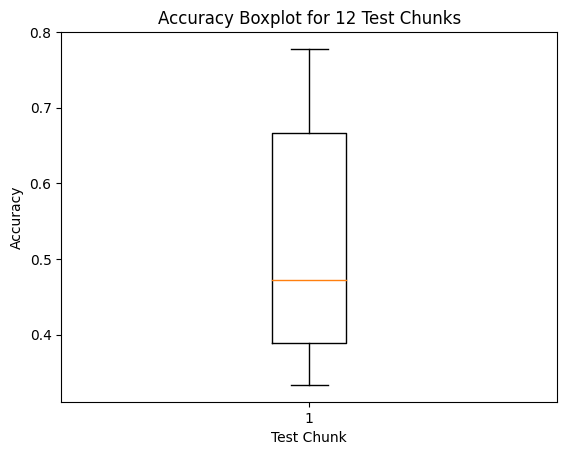

In [58]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()

accuracy_values = []

for val in range(12):
    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values.append(accuracy)

    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


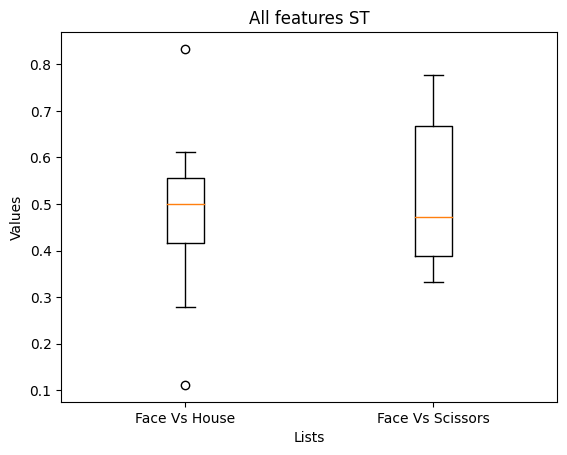

In [62]:
plt.boxplot([accuracy_values1, accuracy_values], labels=['Face Vs House', 'Face Vs Scissors'])

# Add labels and title
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('All features ST')

# Show the plot
plt.show()

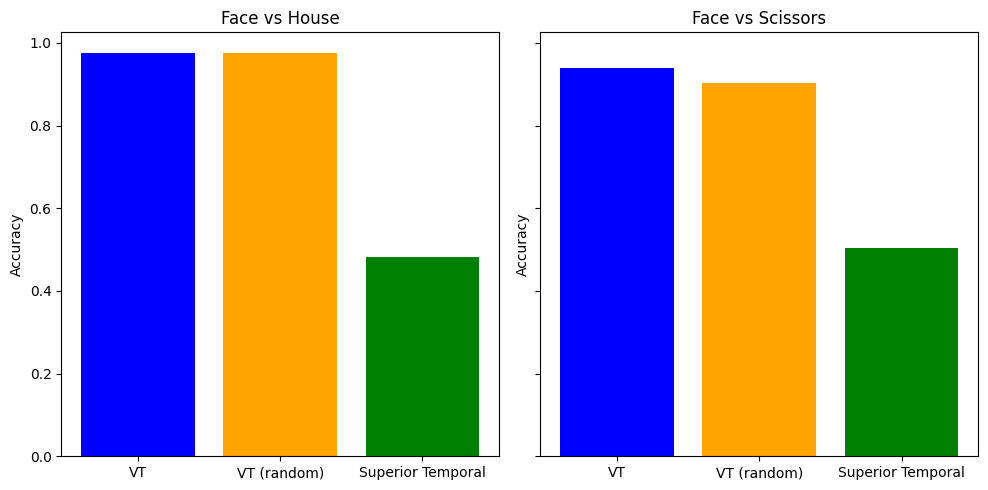

In [70]:
import matplotlib.pyplot as plt
import numpy as np

conditions = ['VT', 'VT (random)', 'Superior Temporal']
face_vs_house_accuracy = np.array([0.976851851851852, 0.976851851851852, 0.4814814814814814])  # Accuracy for Face vs House
face_vs_x_accuracy = np.array([0.9398148148148149, 0.9027777777777778, 0.5046296296296297])  # Accuracy for Face vs X

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].bar(conditions, face_vs_house_accuracy, color=['blue', 'orange', 'green'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Face vs House')


axes[1].bar(conditions, face_vs_x_accuracy, color=['blue', 'orange', 'green'])
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Face vs Scissors')


plt.tight_layout()
plt.show()
